In [74]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime

In [75]:
data = pd.read_csv("coinbaseUSD_1-min_data_2014-12-01_to_2019-01-09.csv")

data.Timestamp = pd.to_datetime(data.Timestamp, unit='s')
data.index = data.Timestamp
data.fillna(method='ffill', inplace=True)

In [84]:
data = data.resample('D').mean()

In [92]:
df = data.loc[datetime(2016, 1, 1):].copy()

In [95]:
df['SMA10_Close'] = df['Close'].rolling(10).mean()
df['SMA45_Close'] = df['Close'].rolling(45).mean()
df['SMA90_Close'] = df['Close'].rolling(90).mean()

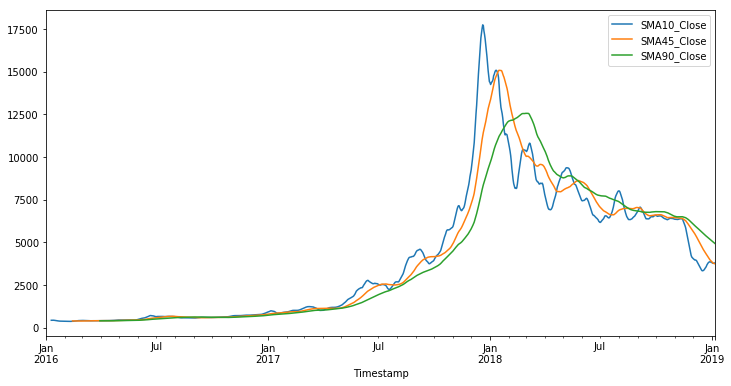

In [103]:
plt.figure(figsize=(12,6))
df['SMA10_Close'].plot()
df['SMA45_Close'].plot()
df['SMA90_Close'].plot()
plt.legend()
plt.show()

In [109]:
df['ema10'] = pd.Series.ewm(df['Close'], span=10).mean()
df['ema45'] = pd.Series.ewm(df['Close'], span=45).mean()
df['ema90'] = pd.Series.ewm(df['Close'], span=90).mean()

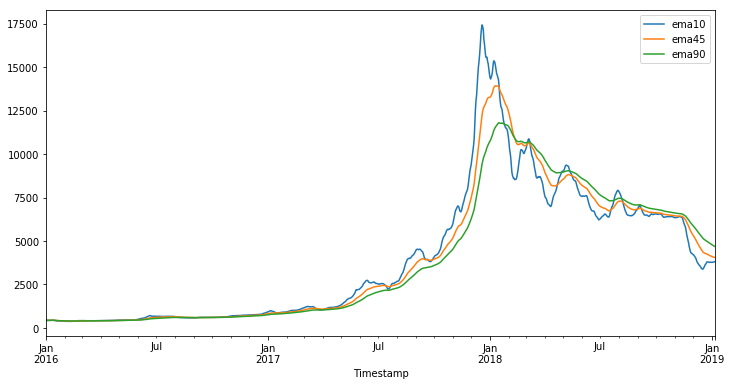

In [110]:
plt.figure(figsize=(12,6))
df['ema10'].plot()
df['ema45'].plot()
df['ema90'].plot()
plt.legend()
plt.show()